'''
1
'''

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
dataset = pd.read_csv('housing.csv')

In [4]:
df = pd.DataFrame(data=dataset)

In [5]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.shape

(506, 14)

In [8]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

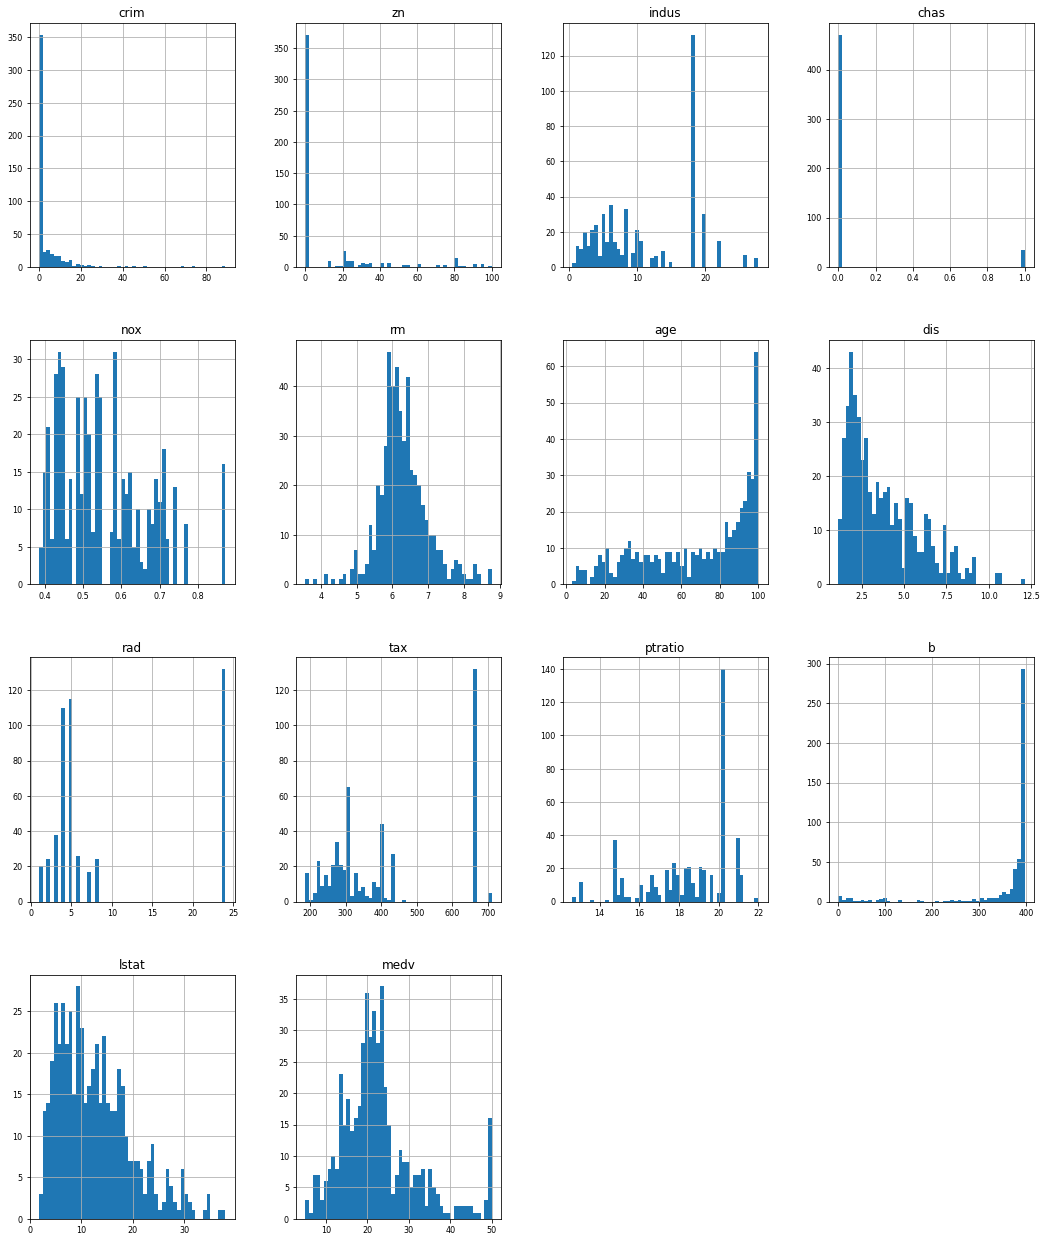

In [9]:
df.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [10]:
corr = df.corr()
corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

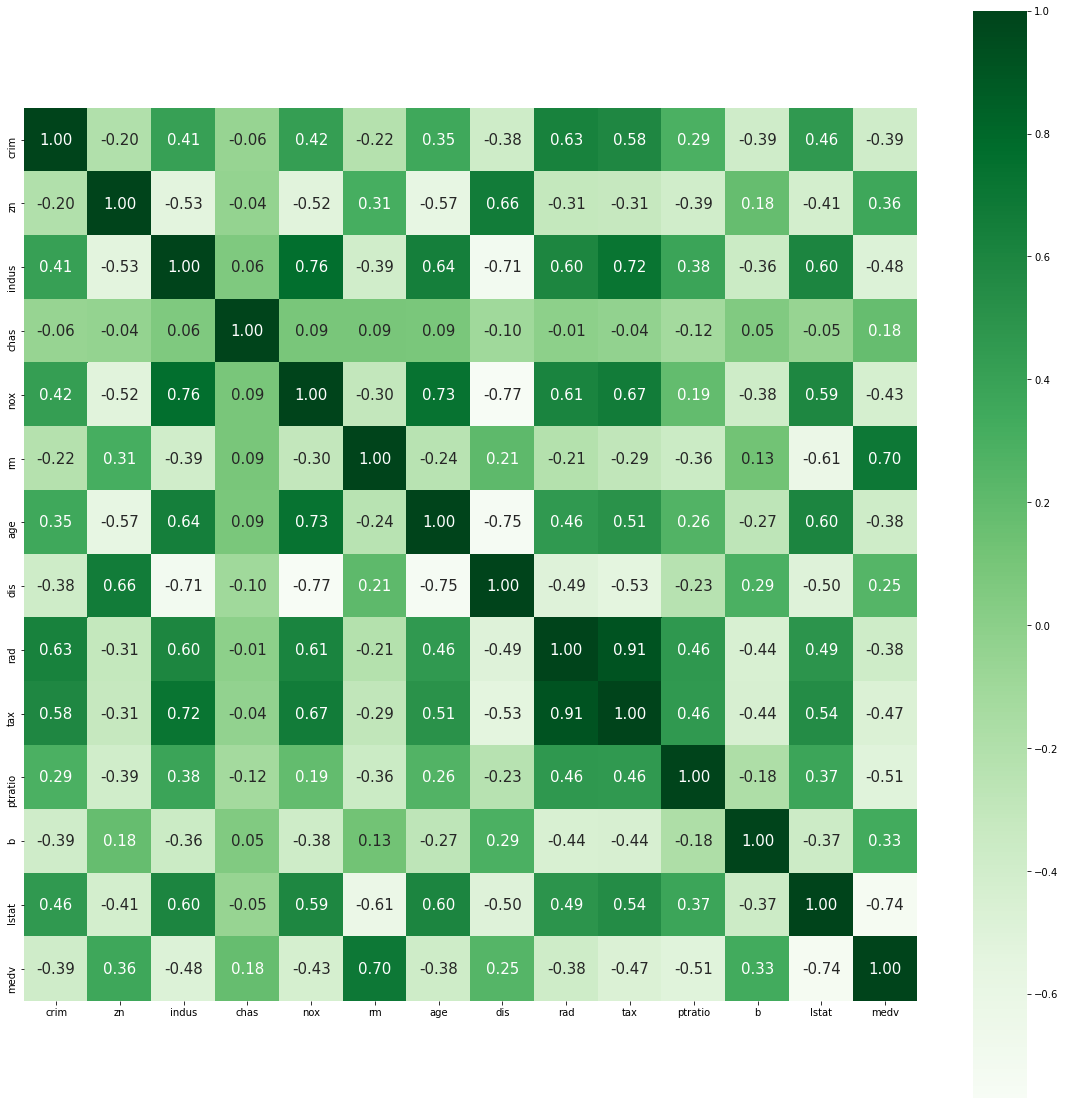

In [11]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [12]:
features = dataset.drop(['medv'], axis=1)
label = dataset['medv']

In [14]:
import sys
scalers = [StandardScaler(), PowerTransformer(method='yeo-johnson', standardize=True, copy=True), PowerTransformer(method='box-cox',standardize=True, copy=True), QuantileTransformer(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]
for i in scalers:
    try:
        scaler = i
        features_scaled = scaler.fit_transform(features.values)
        label_scaled = scaler.fit_transform(label.values.reshape(-1,1))
        feature_train, feature_test,label_train, label_test = train_test_split(features_scaled, label_scaled, random_state=10)
                
        lm = LinearRegression()
        lm.fit(feature_train, label_train)
        predictions = lm.predict(feature_test)

        mse = mean_squared_error(label_test, predictions)
        mae = mean_absolute_error(label_test, predictions)
        r2 = r2_score(label_test, predictions)
        print("Preprocessing by {}".format(i))
        print("MSE (Mean Squared Error)", round(mse, 3))
        print("MAE (Mean Absolute Error)", round(mae, 3))
        print("r^2 score", round(r2,3))
        print('RMSE (Root Mean Squared Error):', round(np.sqrt(mean_squared_error(label_test, predictions)), 3))
        print("")
    except:
        print("Unexpected error:", sys.exc_info()[0])
        print("")
        pass

Preprocessing by StandardScaler()
MSE (Mean Squared Error) 0.384
MAE (Mean Absolute Error) 0.42
r^2 score 0.675
RMSE (Root Mean Squared Error): 0.62

Preprocessing by PowerTransformer()
MSE (Mean Squared Error) 0.238
MAE (Mean Absolute Error) 0.351
r^2 score 0.766
RMSE (Root Mean Squared Error): 0.488

Unexpected error: <class 'ValueError'>

Preprocessing by QuantileTransformer()
MSE (Mean Squared Error) 0.019
MAE (Mean Absolute Error) 0.103
r^2 score 0.768
RMSE (Root Mean Squared Error): 0.139

Preprocessing by MinMaxScaler()
MSE (Mean Squared Error) 0.016
MAE (Mean Absolute Error) 0.086
r^2 score 0.675
RMSE (Root Mean Squared Error): 0.127

Preprocessing by MaxAbsScaler()
MSE (Mean Squared Error) 0.013
MAE (Mean Absolute Error) 0.077
r^2 score 0.675
RMSE (Root Mean Squared Error): 0.114

Preprocessing by RobustScaler()
MSE (Mean Squared Error) 0.51
MAE (Mean Absolute Error) 0.484
r^2 score 0.675
RMSE (Root Mean Squared Error): 0.714



Dari percobaan yang telah dilakukan, preprocessing dengan menggunakan metode quantile transformer memiliki tingkat akurasi yang lebih tinggi (r2 score 0.768) dibandingkan dengan yang lain. Nilai r2 score yang tinggi juga diperoleh dengan menggunakan power transformer metode yeo-johnson tetapi angkanya masih dibawah quantile transformer sebesar 0.766.
Preprocessing dengan menggunakan metode box-cox tidak dapat digunakan pada dataset boston karena terdapat nilai negatif pada dataset. Metode box-cox hanya dapat digunakan pada dataset yang tidak memiliki nilai negatif.

'''
2
'''

In [22]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
est_num = [*range(10, 201, 10)]
for index, val in enumerate(est_num):
    rfg = RandomForestRegressor(n_estimators = val, bootstrap = True, max_features = 'sqrt')
    rfg.fit(feature_train, label_train)
    y_pred = rfg.predict(feature_test)
    print('Accuracy of Random Forest with estimator {} on test set: {:.2f}'.format(val, rfg.score(feature_test, label_test)))
    mse = mean_squared_error(label_test, y_pred)
    mae = mean_absolute_error(label_test, y_pred)
    r2 = r2_score(label_test, y_pred)
    print("Preprocessing by {}".format(i))
    print("MSE (Mean Squared Error)", round(mse, 3))
    print("MAE (Mean Absolute Error)", round(mae, 3))
    print("r^2 score", round(r2,3))
    print('RMSE (Root Mean Squared Error):', round(np.sqrt(mean_squared_error(label_test, y_pred)), 3))
    print("")

Accuracy of Random Forest with estimator 10 on test set: 0.85
Preprocessing by RobustScaler()
MSE (Mean Squared Error) 0.242
MAE (Mean Absolute Error) 0.342
r^2 score 0.846
RMSE (Root Mean Squared Error): 0.492

Accuracy of Random Forest with estimator 20 on test set: 0.84
Preprocessing by RobustScaler()
MSE (Mean Squared Error) 0.257
MAE (Mean Absolute Error) 0.329
r^2 score 0.836
RMSE (Root Mean Squared Error): 0.507

Accuracy of Random Forest with estimator 30 on test set: 0.85
Preprocessing by RobustScaler()
MSE (Mean Squared Error) 0.231
MAE (Mean Absolute Error) 0.325
r^2 score 0.853
RMSE (Root Mean Squared Error): 0.48

Accuracy of Random Forest with estimator 40 on test set: 0.84
Preprocessing by RobustScaler()
MSE (Mean Squared Error) 0.248
MAE (Mean Absolute Error) 0.348
r^2 score 0.842
RMSE (Root Mean Squared Error): 0.498

Accuracy of Random Forest with estimator 50 on test set: 0.84
Preprocessing by RobustScaler()
MSE (Mean Squared Error) 0.255
MAE (Mean Absolute Error) 0.

In [39]:
#XGBoost
import xgboost as xgb
est_num = [*range(10, 201, 10)]
for index, val in enumerate(est_num):
    xgreg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=5, alpha=5, n_estimators = val)
    xgreg.fit(feature_train, label_train)
    y_pred = xgreg.predict(feature_test)
    print('Accuracy of xgboost with estimator {} on test set: {:.2f}'.format(val, xgreg.score(feature_test, label_test)))
    mse = mean_squared_error(label_test, y_pred)
    mae = mean_absolute_error(label_test, y_pred)
    r2 = r2_score(label_test, y_pred)
    print("Preprocessing by {}".format(i))
    print("MSE (Mean Squared Error)", round(mse, 3))
    print("MAE (Mean Absolute Error)", round(mae, 3))
    print("r^2 score", round(r2,3))
    print('RMSE (Root Mean Squared Error):', round(np.sqrt(mean_squared_error(label_test, y_pred)), 3))
    print("")

Accuracy of xgboost with estimator 10 on test set: 0.61
Preprocessing by RobustScaler()
MSE (Mean Squared Error) 0.605
MAE (Mean Absolute Error) 0.565
r^2 score 0.614
RMSE (Root Mean Squared Error): 0.778

Accuracy of xgboost with estimator 20 on test set: 0.74
Preprocessing by RobustScaler()
MSE (Mean Squared Error) 0.403
MAE (Mean Absolute Error) 0.442
r^2 score 0.743
RMSE (Root Mean Squared Error): 0.635

Accuracy of xgboost with estimator 30 on test set: 0.78
Preprocessing by RobustScaler()
MSE (Mean Squared Error) 0.346
MAE (Mean Absolute Error) 0.399
r^2 score 0.779
RMSE (Root Mean Squared Error): 0.588

Accuracy of xgboost with estimator 40 on test set: 0.80
Preprocessing by RobustScaler()
MSE (Mean Squared Error) 0.32
MAE (Mean Absolute Error) 0.378
r^2 score 0.796
RMSE (Root Mean Squared Error): 0.566

Accuracy of xgboost with estimator 50 on test set: 0.81
Preprocessing by RobustScaler()
MSE (Mean Squared Error) 0.306
MAE (Mean Absolute Error) 0.366
r^2 score 0.805
RMSE (Root

In [42]:
#SVR
from sklearn.svm import SVR

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features.values)
label_scaled = scaler.fit_transform(label.values.reshape(-1,1))
feature_train, feature_test,label_train, label_test = train_test_split(features_scaled, label_scaled, random_state=10)

kernels = ['rbf', 'poly', 'linear']
for kernel in kernels:
    svreg = SVR(kernel=kernel)
    svreg.fit(feature_train, label_train)
    y_pred = svreg.predict(feature_test)
    print('Accuracy of SVR with kernel {} on test set: {:.2f}'.format(kernel, svreg.score(feature_test, label_test)))
    mse = mean_squared_error(label_test, y_pred)
    mae = mean_absolute_error(label_test, y_pred)
    r2 = r2_score(label_test, y_pred)
    print("Preprocessing by {}".format(kernel))
    print("MSE (Mean Squared Error)", round(mse, 3))
    print("MAE (Mean Absolute Error)", round(mae, 3))
    print("r^2 score", round(r2,3))
    print('RMSE (Root Mean Squared Error):', round(np.sqrt(mean_squared_error(label_test, y_pred)), 3))
    print("")

Accuracy of SVR with kernel rbf on test set: 0.77
Preprocessing by rbf
MSE (Mean Squared Error) 0.274
MAE (Mean Absolute Error) 0.313
r^2 score 0.768
RMSE (Root Mean Squared Error): 0.523

Accuracy of SVR with kernel poly on test set: 0.75
Preprocessing by poly
MSE (Mean Squared Error) 0.297
MAE (Mean Absolute Error) 0.377
r^2 score 0.749
RMSE (Root Mean Squared Error): 0.545

Accuracy of SVR with kernel linear on test set: 0.64
Preprocessing by linear
MSE (Mean Squared Error) 0.427
MAE (Mean Absolute Error) 0.418
r^2 score 0.638
RMSE (Root Mean Squared Error): 0.654



In [50]:
#kNNRegressors
from sklearn.neighbors import KNeighborsRegressor
n_neighbors = [*range(1, 20, 1)]
for index,val in enumerate(n_neighbors):
    kreg = KNeighborsRegressor(n_neighbors=val, weights='distance', algorithm='brute')
    kreg.fit(feature_train, label_train)
    y_pred = kreg.predict(feature_test)
    print('Accuracy of kNNRegressors with n_neighbor {} on test set: {:.2f}'.format(val, kreg.score(feature_test, label_test)))
    mse = mean_squared_error(label_test, y_pred)
    mae = mean_absolute_error(label_test, y_pred)
    r2 = r2_score(label_test, y_pred)
    print("Preprocessing by {}".format(kernel))
    print("MSE (Mean Squared Error)", round(mse, 3))
    print("MAE (Mean Absolute Error)", round(mae, 3))
    print("r^2 score", round(r2,3))
    print('RMSE (Root Mean Squared Error):', round(np.sqrt(mean_squared_error(label_test, y_pred)), 3))
    print("")

Accuracy of kNNRegressors with n_neighbor 1 on test set: 0.70
Preprocessing by linear
MSE (Mean Squared Error) 0.352
MAE (Mean Absolute Error) 0.369
r^2 score 0.702
RMSE (Root Mean Squared Error): 0.593

Accuracy of kNNRegressors with n_neighbor 2 on test set: 0.75
Preprocessing by linear
MSE (Mean Squared Error) 0.297
MAE (Mean Absolute Error) 0.338
r^2 score 0.748
RMSE (Root Mean Squared Error): 0.545

Accuracy of kNNRegressors with n_neighbor 3 on test set: 0.81
Preprocessing by linear
MSE (Mean Squared Error) 0.229
MAE (Mean Absolute Error) 0.317
r^2 score 0.806
RMSE (Root Mean Squared Error): 0.478

Accuracy of kNNRegressors with n_neighbor 4 on test set: 0.77
Preprocessing by linear
MSE (Mean Squared Error) 0.273
MAE (Mean Absolute Error) 0.34
r^2 score 0.769
RMSE (Root Mean Squared Error): 0.522

Accuracy of kNNRegressors with n_neighbor 5 on test set: 0.74
Preprocessing by linear
MSE (Mean Squared Error) 0.302
MAE (Mean Absolute Error) 0.35
r^2 score 0.744
RMSE (Root Mean Squar

Dari model yang digunakan, RandomForestRegressor rata-rata memiliki nilai r^2 score yang lebih tinggi dan nilai rmse yang lebih rendah. Nilai r^2 score yang tinggi artinya outputnya tidak underfit dan tidak overfit. Outputnya memiliki trend diagonal. Sedangkan rmse yang rendah artinya standar deviasinya rendah. Data tidak memiliki banyak outlier atau dapat dikatakan model kita sudah optimal. Nilai r^2 score yang diperoleh dari model RandomForestRegressor dengan n_estimator 90 adalah 0.86, sedangkan nilai rmse yang diperoleh dari model tersebut adalah 0.473.